# DATA606 Week 8 & 9 & 10 - Modeling
Team 2 UMBC Spring 2024

### File imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

import xgboost as xgb
import scipy.stats as stats

#visuals
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


#model selection tools
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold


#models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge


import warnings
warnings.filterwarnings(action='ignore')

## Data Transformation

### Senator Approval Ratings and Demographic Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Ecross7/approvalRatings/main/team_csv_code/final_merged.csv',parse_dates=['birthday','start_date','end_date'])

In [ ]:
#df = df.rename(columns={'Emotion': 'emotion_majority', 'Race': 'race_majority'})
# 'Val1': 'x_valence', 'Val2': 'y_valence', 'Val3': 'z_valence', 'Valence (Mean)': 'valence_mean'})

In [ ]:
df.dtypes

full_name                       object
bioguide_id                     object
govtrack_id                      int64
pct                            float64
birthday                datetime64[ns]
gender                          object
election_date                   object
party                           object
senate_class                   float64
stage                           object
cycle                            int64
start_date              datetime64[ns]
end_date                datetime64[ns]
congressional                    int64
bills-introduced               float64
bills-with-companion           float64
cosponsored                    float64
cosponsors                     float64
ideology                       float64
leadership                     float64
missed-votes                   float64
Emotion                         object
Norm_valence                   float64
Race                            object
Val1                           float64
Val2                     

In [ ]:
df

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority
0,amy_klobuchar,K000367,412242,60.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.099,-0.198,-0.297,46.458843,32.722343,-0.198000,64,58.0,happy
1,amy_klobuchar,K000367,412242,57.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.070,-0.134,-0.174,46.458843,32.722343,-0.126000,64,58.0,happy
2,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396000,64,58.0,happy
3,amy_klobuchar,K000367,412242,53.6,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396000,64,58.0,happy
4,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396000,64,58.0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,tommy_tuberville,T000278,456796,49.7,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,0.123,0.025,0.085,12.070111,12.685963,0.077667,70,65.0,neutral
2590,tommy_tuberville,T000278,456796,47.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,0.299,0.209,0.356,12.070111,12.685963,0.288000,70,66.0,neutral
2591,tommy_tuberville,T000278,456796,50.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,-0.098,-0.148,-0.186,12.070111,12.685963,-0.144000,70,66.0,neutral
2592,tommy_tuberville,T000278,456796,52.0,1954-09-18,M,2020-11-03,Republican,2.0,general,...,white,0.123,0.025,0.085,12.070111,12.685963,0.077667,70,66.0,neutral


In [ ]:
df.describe()

,govtrack_id,pct,birthday,senate_class,cycle,start_date,end_date,congressional,bills-introduced,bills-with-companion,...,missed-votes,Norm_valence,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age
count,2594.000000,2594.000000,2594,2594.000000,2594.000000,2594,2594,2594.000000,2594.000000,2594.000000,...,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000
mean,405222.759445,46.390640,1960-05-01 15:47:02.821896704,1.920971,2019.582884,2020-03-07 13:02:10.454895872,2020-03-12 08:00:44.410177536,116.034695,58.152660,17.127217,...,3.735556,47.335739,0.161630,0.075725,0.194580,8.479186,12.937320,0.143978,64.199306,59.361218
min,300018.000000,6.200000,1933-06-22 00:00:00,1.000000,2018.000000,2016-11-16 00:00:00,2016-11-17 00:00:00,114.000000,0.000000,0.000000,...,0.000000,-0.553504,-0.198000,-0.297000,-0.297000,-97.255810,-38.817667,-0.198000,37.000000,33.000000
25%,412218.000000,44.000000,1952-11-14 12:00:00,1.000000,2018.000000,2018-10-08 00:00:00,2018-10-11 00:00:00,115.000000,40.000000,10.000000,...,1.002000,31.259388,-0.089000,-0.173000,-0.098000,-15.574538,-0.402466,-0.124667,55.000000,51.000000
50%,412509.000000,47.000000,1958-12-01 00:00:00,2.000000,2020.000000,2020-07-15 12:00:00,2020-07-20 00:00:00,116.000000,54.000000,14.000000,...,2.002000,44.797374,0.207000,0.122000,0.204000,4.276279,10.890920,0.190333,66.000000,61.000000
75%,456790.000000,50.000000,1969-07-23 00:00:00,3.000000,2020.000000,2020-10-27 00:00:00,2020-10-31 00:00:00,117.000000,73.000000,19.000000,...,4.341000,64.413596,0.396000,0.297000,0.495000,32.791158,26.127828,0.396000,72.000000,66.000000
max,456858.000000,75.000000,1987-02-16 00:00:00,3.000000,2024.000000,2022-12-19 00:00:00,2022-12-20 00:00:00,117.000000,218.000000,72.000000,...,55.139000,99.336834,0.400000,0.300000,0.500000,99.205422,59.526603,0.400000,91.000000,85.000000
std,49365.951335,7.329122,NaN,0.833358,1.486367,NaN,NaN,0.739727,36.513434,12.862020,...,4.997976,22.007112,0.226634,0.219508,0.289379,38.932422,19.860654,0.244033,10.699773,10.370769


In [ ]:
df.shape

(2594, 33)

In [ ]:
# Could we use Initial term age instead?
def calculate_servingAge(dtob,startdate):
  # Calculate the age by subtracting the birth year from the current year
  # Adjust the age if the birth month and day are after today's month and day
  return startdate.year - dtob.year - ((startdate.month, startdate.day) < (dtob.month, dtob.day))


In [ ]:
# create serving_age column from birthday to start of cycle
df['serving_age'] = df.apply(lambda row : (calculate_servingAge(row.birthday, row.start_date)), axis=1 )

#### EDA Plots

In [ ]:
df.head()

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority
0,amy_klobuchar,K000367,412242,60.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.099,-0.198,-0.297,46.458843,32.722343,-0.198,64,58,happy
1,amy_klobuchar,K000367,412242,57.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.070,-0.134,-0.174,46.458843,32.722343,-0.126,64,58,happy
2,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy
3,amy_klobuchar,K000367,412242,53.6,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy
4,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy


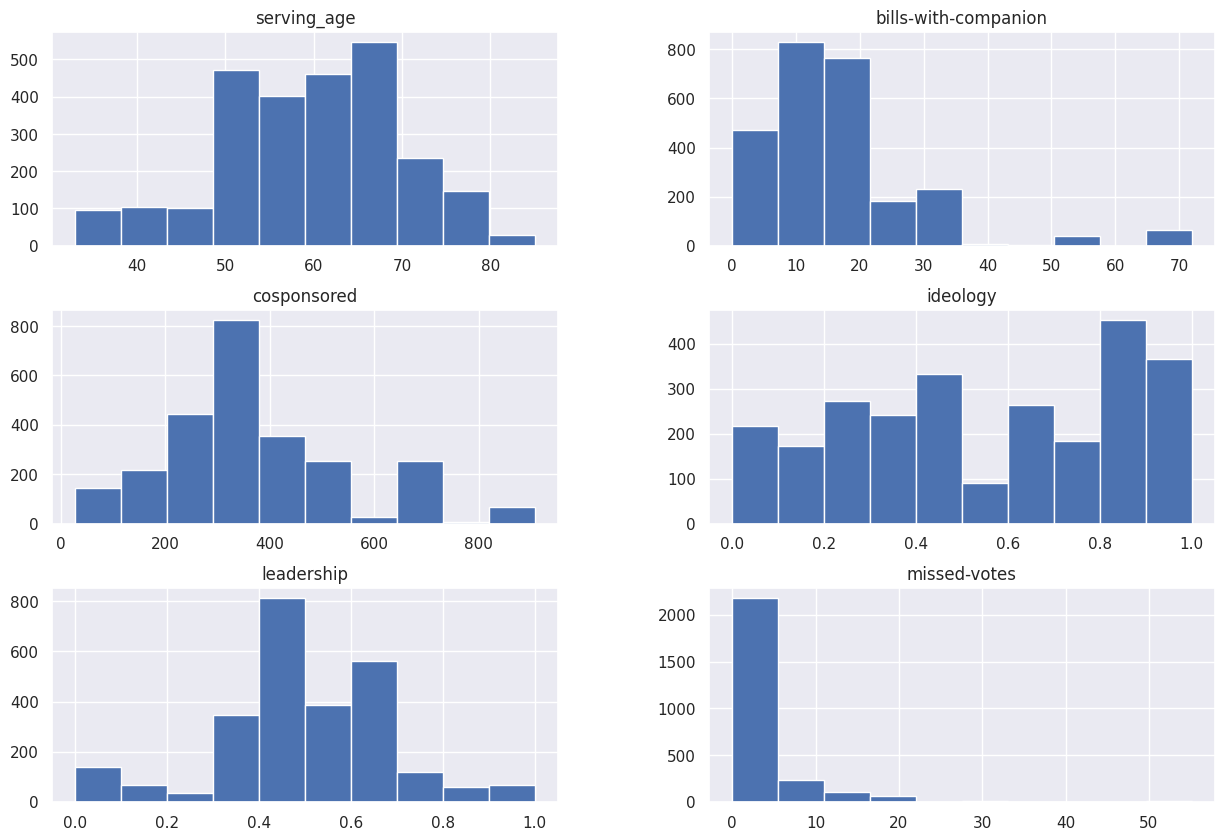

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 10))
#df.plot(kind='hist', ax=ax);
df[['serving_age','bills-with-companion', 'cosponsored','ideology','leadership','missed-votes']].hist(ax=ax);

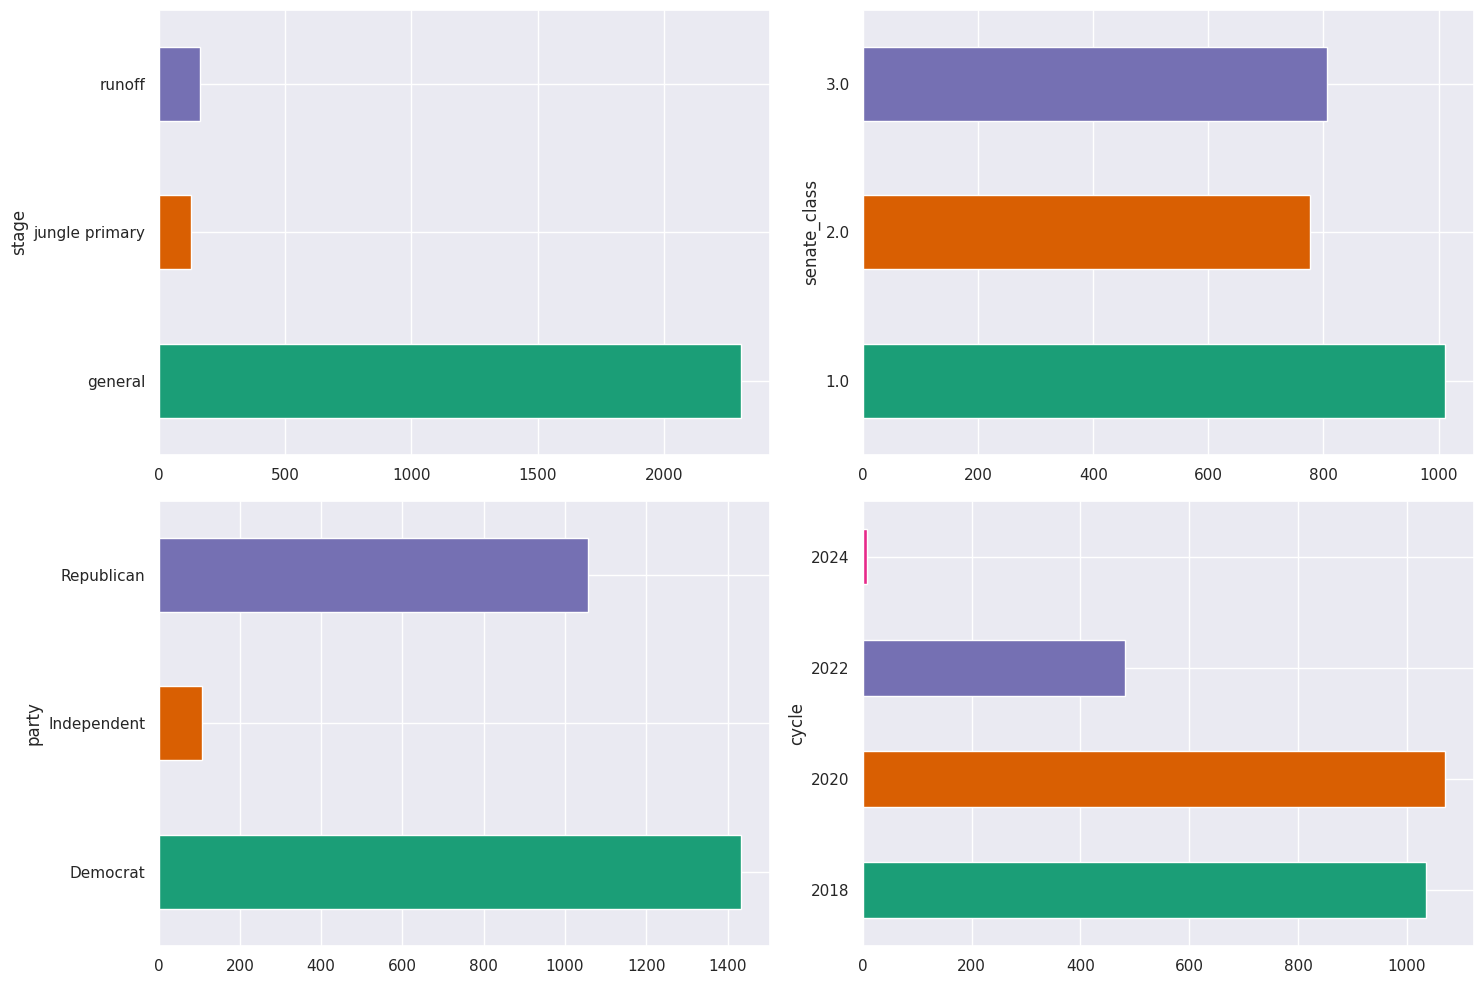

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

df.groupby('stage').size().plot(ax=axes[0][0], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
df.groupby('party').size().plot(ax=axes[1][0], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
df.groupby('senate_class').size().plot(ax=axes[0][1], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
df.groupby('cycle').size().plot(ax=axes[1][1], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
plt.tight_layout();

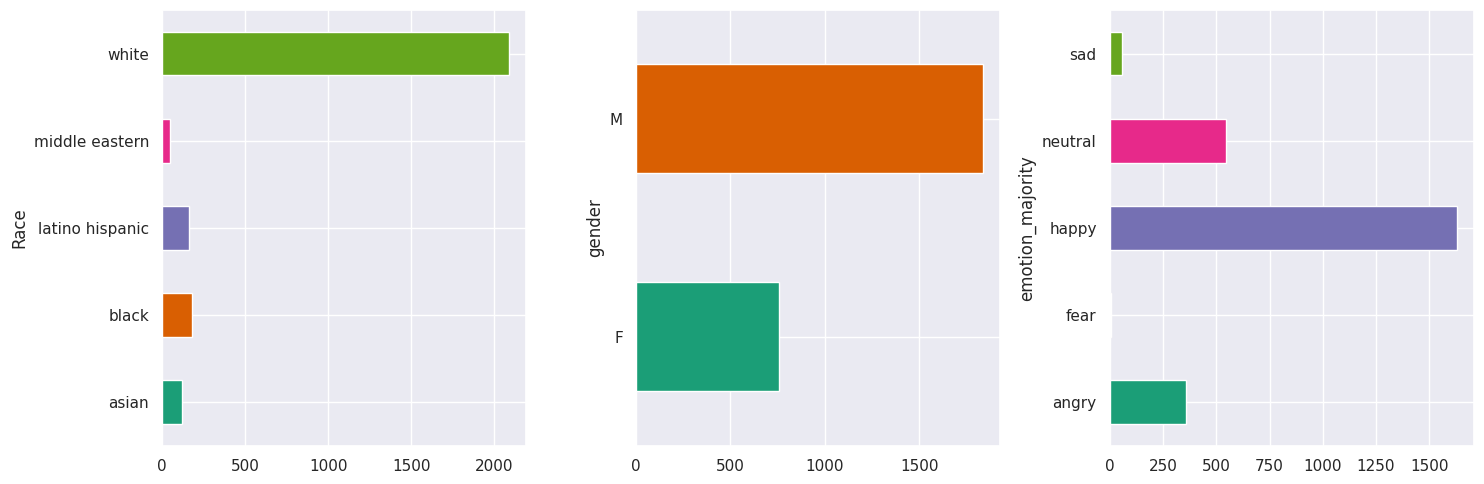

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

df.groupby('Race').size().plot(ax=axes[0], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
df.groupby('gender').size().plot(ax=axes[1], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
df.groupby('emotion_majority').size().plot(ax=axes[2], kind='barh', color=sns.palettes.mpl_palette('Dark2'));
plt.tight_layout();

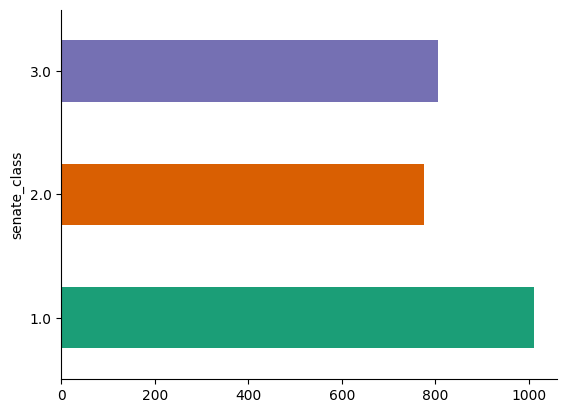

In [ ]:
# @title senate class

df.groupby('senate_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

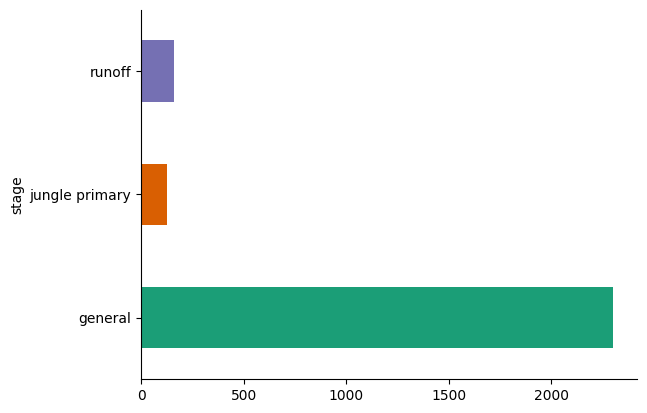

In [ ]:
# @title stage

df.groupby('stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

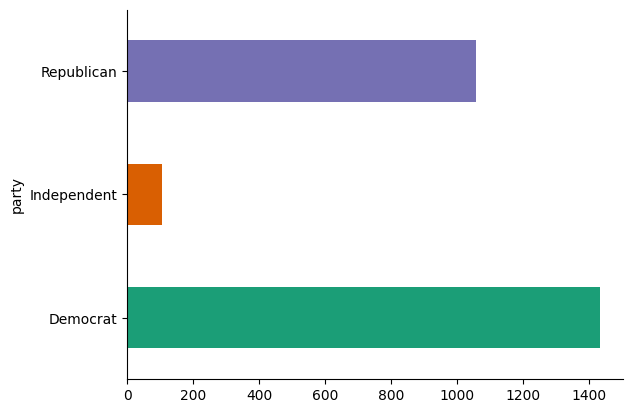

In [ ]:
# @title party

df.groupby('party').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

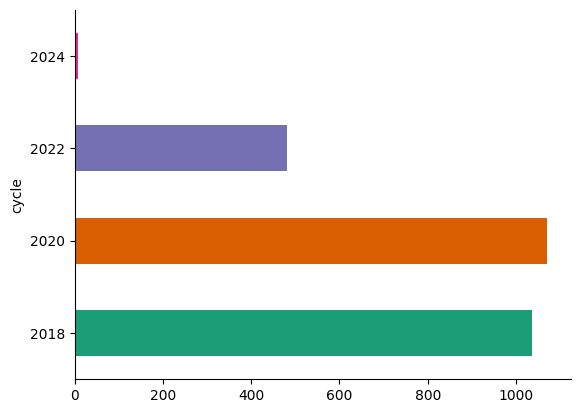

In [ ]:
# @title cycle
df.groupby('cycle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

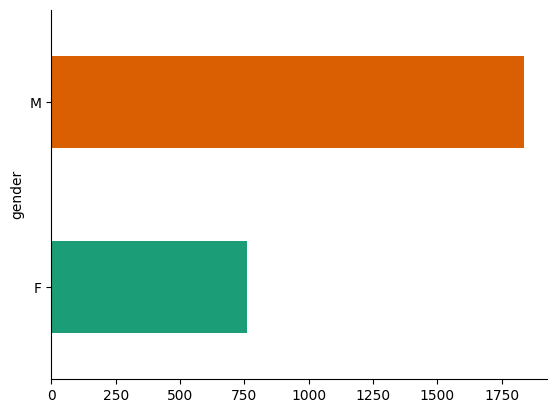

In [ ]:
# @title gender

df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

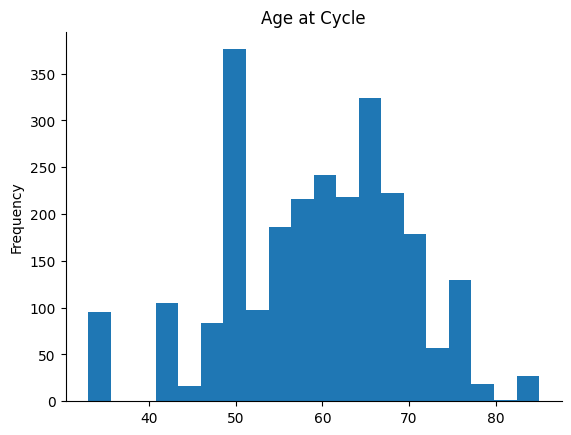

In [ ]:
df['serving_age'].plot(kind='hist', bins=20, title='Age at Cycle')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

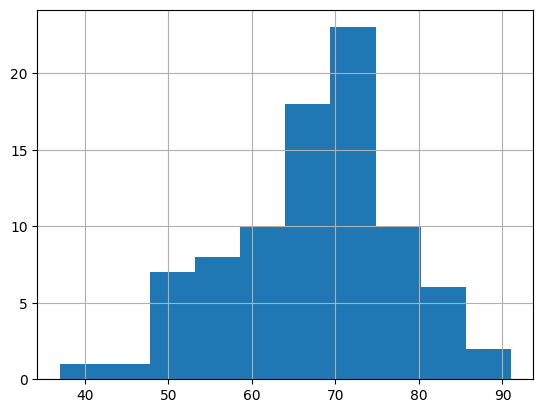

In [ ]:
df.groupby('full_name')['age'].max().hist()

#### Feature Engineering - add the age at the time of serving

Text(0.5, 1.0, 'Counts of Senator Ages')

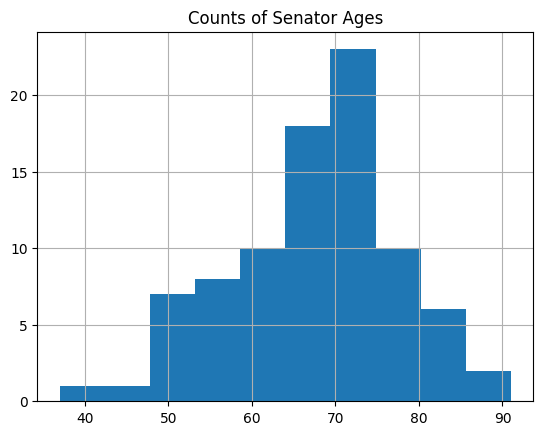

In [ ]:
df.groupby('full_name')['age'].max().hist()
plt.title('Counts of Senator Ages')

In [ ]:
# todo: start_date & end_date -> How do we want to handle?

### Emotion Detection EDA
Classification and Valence scores

Text(0, 0.5, 'Valence Score')

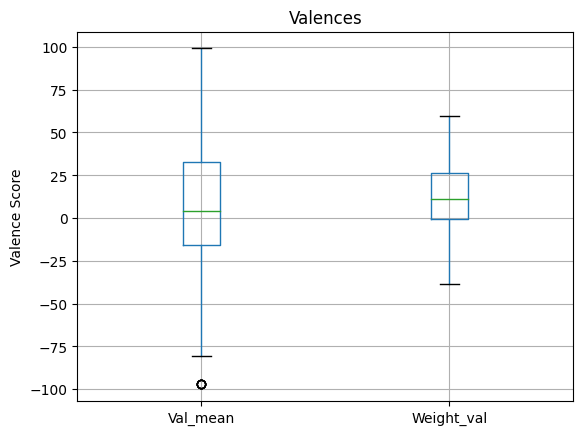

In [ ]:
df[['Val_mean','Weight_val']].boxplot()
plt.title("Valences")
plt.ylabel("Valence Score")

Text(0, 0.5, 'Valence Score')

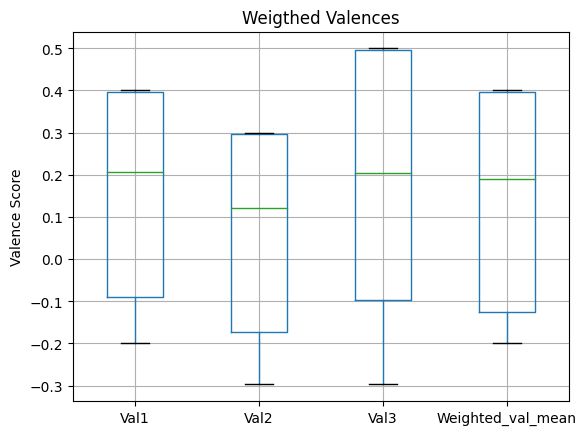

In [ ]:
df[['Val1','Val2','Val3', 'Weighted_val_mean']].boxplot()
plt.title("Weigthed Valences")
plt.ylabel("Valence Score")

In [ ]:
# todo: update with real inferences

In [ ]:
df['Race'].value_counts()

Race
white              2089
black               181
latino hispanic     159
asian               117
middle eastern       48
Name: count, dtype: int64

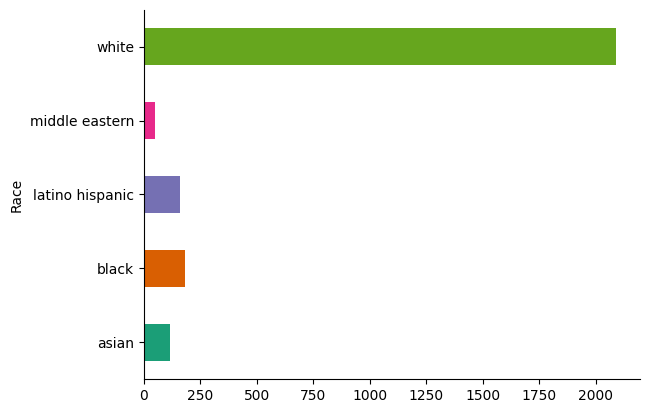

In [ ]:
df.groupby('Race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['emotion_majority']

0         happy
1         happy
2         happy
3         happy
4         happy
         ...   
2589    neutral
2590    neutral
2591    neutral
2592    neutral
2593    neutral
Name: emotion_majority, Length: 2594, dtype: object

In [ ]:
df['emotion_majority'].value_counts()

emotion_majority
happy      1629
neutral     547
angry       356
sad          58
fear          4
Name: count, dtype: int64

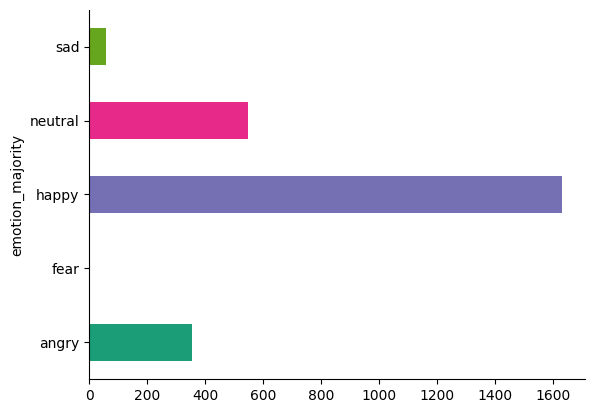

In [ ]:
df.groupby('emotion_majority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# TODO: General EDA on the distribution of emotion inferences like frequency of emotion class and averge valence

<Axes: title={'center': 'Approval Rating Percentage'}, ylabel='Frequency'>

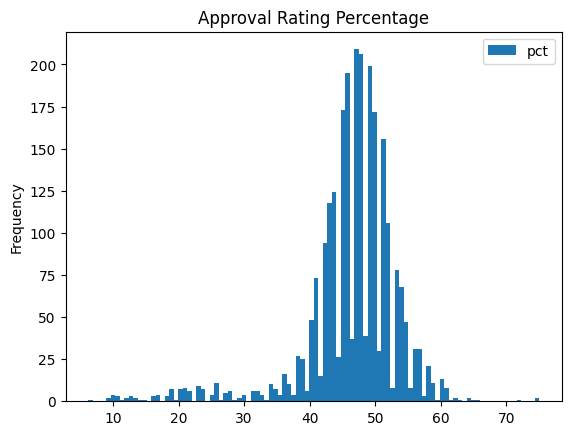

In [ ]:
df[['pct']].plot(kind='hist', bins=100, title='Approval Rating Percentage')

<Axes: title={'center': 'Approval Rating Percentage'}, ylabel='Frequency'>

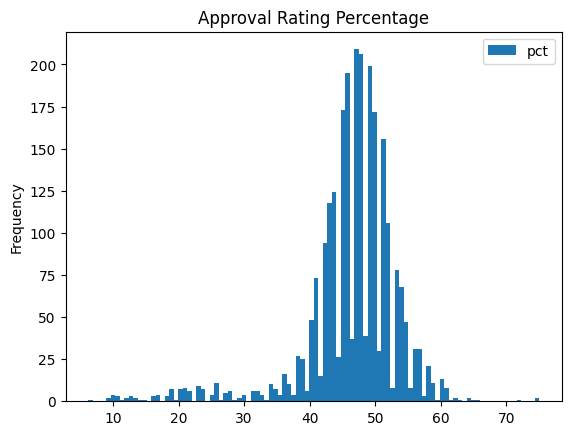

In [ ]:
df[['pct']].plot(kind='hist', bins=100, title='Approval Rating Percentage')

In [ ]:
df[['pct']].describe()

,pct
count,2594.000000
mean,46.390640
std,7.329122
min,6.200000
25%,44.000000
50%,47.000000
75%,50.000000
max,75.000000


### Final Feature Selection

In [ ]:
df.columns # not needed: bioguide_id, govtrack_id, congressional

Index(['full_name', 'bioguide_id', 'govtrack_id', 'pct', 'birthday', 'gender',
       'election_date', 'party', 'senate_class', 'stage', 'cycle',
       'start_date', 'end_date', 'congressional', 'bills-introduced',
       'bills-with-companion', 'cosponsored', 'cosponsors', 'ideology',
       'leadership', 'missed-votes', 'Emotion', 'Norm_valence', 'Race', 'Val1',
       'Val2', 'Val3', 'Val_mean', 'Weight_val', 'Weighted_val_mean', 'age',
       'serving_age', 'emotion_majority'],
      dtype='object')

In [ ]:
df['missed-votes'].describe() # bills-introduced

count    2594.000000
mean        3.735556
std         4.997976
min         0.000000
25%         1.002000
50%         2.002000
75%         4.341000
max        55.139000
Name: missed-votes, dtype: float64

In [ ]:
df['cosponsored'].describe()

count    2594.000000
mean      370.689283
std       183.545950
min        28.000000
25%       268.000000
50%       340.000000
75%       458.000000
max       907.000000
Name: cosponsored, dtype: float64

In [ ]:
target = ['pct'] # could we do binary classification with positive or negative score?
date_features = ['start_date','end_date','birthday'] # is cycle really "date" or categorical?
categorical_features = ['emotion_majority','Race','gender','party','senate_class','stage','cycle','congressional']
numerical_features = ['serving_age','Val_mean','Weighted_val_mean','bills-with-companion',
                      'cosponsored','ideology','leadership','missed-votes'] # omitting serving_age due to correlation with age

<Axes: >

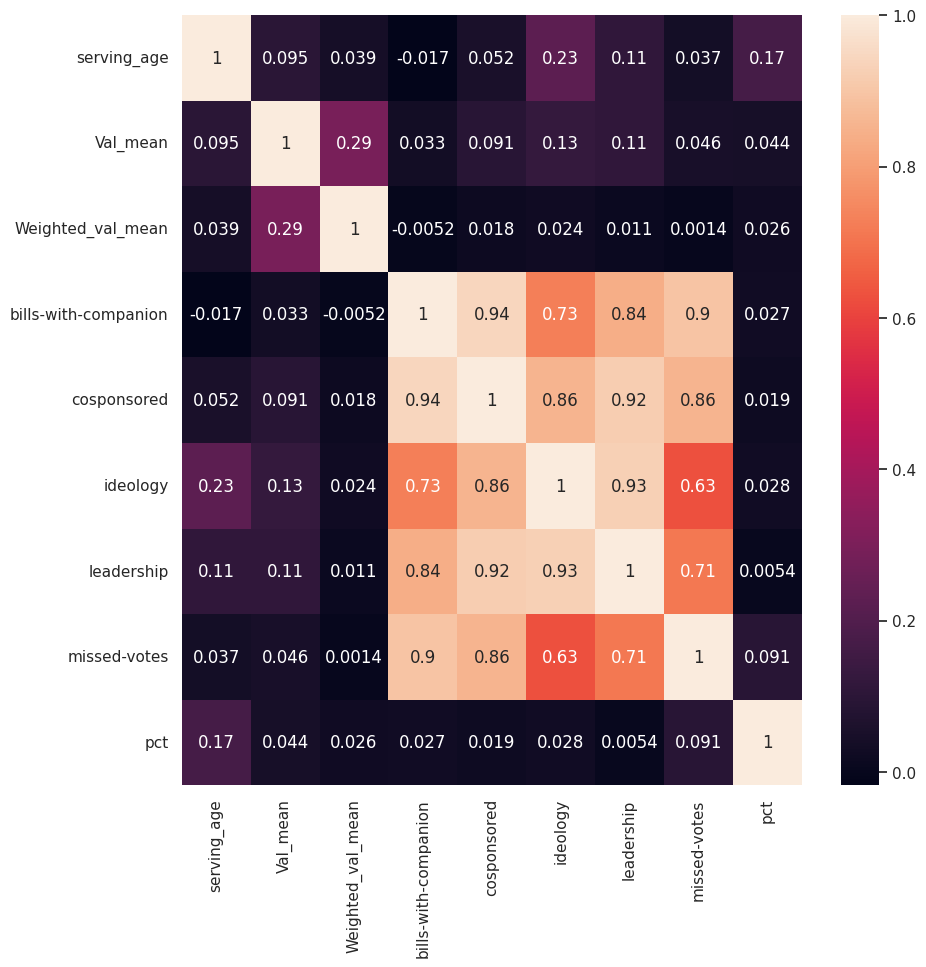

In [ ]:
# create heatmap to view correlations
sns.set(font_scale = 1)
plt.figure(figsize = (10,10))
sns.heatmap(df[numerical_features + target].corr(numeric_only=True), annot=True)

### Train/Test Split

In [ ]:
df.head()

,full_name,bioguide_id,govtrack_id,pct,birthday,gender,election_date,party,senate_class,stage,...,Race,Val1,Val2,Val3,Val_mean,Weight_val,Weighted_val_mean,age,serving_age,emotion_majority
0,amy_klobuchar,K000367,412242,60.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.099,-0.198,-0.297,46.458843,32.722343,-0.198,64,58,happy
1,amy_klobuchar,K000367,412242,57.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,-0.070,-0.134,-0.174,46.458843,32.722343,-0.126,64,58,happy
2,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy
3,amy_klobuchar,K000367,412242,53.6,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy
4,amy_klobuchar,K000367,412242,53.0,1960-05-25,F,2018-11-06,Democrat,1.0,general,...,white,0.396,0.297,0.495,46.458843,32.722343,0.396,64,58,happy


In [ ]:
df.isnull().sum()

full_name               0
bioguide_id             0
govtrack_id             0
pct                     0
birthday                0
gender                  0
election_date           0
party                   0
senate_class            0
stage                   0
cycle                   0
start_date              0
end_date                0
congressional           0
bills-introduced        0
bills-with-companion    0
cosponsored             0
cosponsors              0
ideology                0
leadership              0
missed-votes            0
Emotion                 0
Norm_valence            0
Race                    0
Val1                    0
Val2                    0
Val3                    0
Val_mean                0
Weight_val              0
Weighted_val_mean       0
age                     0
serving_age             0
emotion_majority        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   full_name             2594 non-null   object        
 1   bioguide_id           2594 non-null   object        
 2   govtrack_id           2594 non-null   int64         
 3   pct                   2594 non-null   float64       
 4   birthday              2594 non-null   datetime64[ns]
 5   gender                2594 non-null   object        
 6   election_date         2594 non-null   object        
 7   party                 2594 non-null   object        
 8   senate_class          2594 non-null   float64       
 9   stage                 2594 non-null   object        
 10  cycle                 2594 non-null   int64         
 11  start_date            2594 non-null   datetime64[ns]
 12  end_date              2594 non-null   datetime64[ns]
 13  congressional     

In [ ]:
df[categorical_features] = df[categorical_features].astype(str)

In [ ]:
#using random shuffle
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size=0.2, random_state=42)

In [ ]:
X_train

,emotion_majority,Race,gender,party,senate_class,stage,cycle,congressional,serving_age,Val_mean,Weighted_val_mean,bills-with-companion,cosponsored,ideology,leadership,missed-votes
845,happy,white,M,Republican,2.0,general,2020,116,67,-11.454311,0.290000,34.0,687.0,0.904129,0.711988,12.361
2029,neutral,black,M,Democrat,3.0,jungle primary,2020,117,51,-11.317474,0.396000,18.0,369.0,0.464158,0.499642,2.529
790,happy,latino hispanic,M,Democrat,1.0,general,2018,115,63,10.159856,0.396000,8.0,230.0,0.322730,0.442863,0.668
1370,happy,white,M,Republican,2.0,general,2020,116,65,12.819122,0.356000,16.0,420.0,0.714706,0.519217,2.917
25,happy,white,M,Democrat,1.0,general,2018,115,75,-28.026728,-0.184000,19.0,470.0,0.917488,0.692852,4.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,angry,white,M,Democrat,3.0,general,2022,117,57,-28.639181,-0.124667,10.0,287.0,0.200704,0.372111,1.264
1095,happy,white,F,Republican,2.0,general,2020,116,50,44.178333,0.388000,15.0,362.0,0.662370,0.505583,2.222
1130,happy,white,F,Republican,3.0,jungle primary,2020,116,49,21.308727,0.031333,12.0,302.0,0.419735,0.450728,1.667
1294,happy,white,F,Independent,1.0,general,2018,116,42,0.574318,0.163667,7.0,216.0,0.232713,0.362902,0.694


### Normalize Numeric Features

In [ ]:
# separate pipeline for numeric so more flexible with real data
num_pipe = Pipeline([
  ('std_scaler', StandardScaler())
])

### Feat Pipeline

In [ ]:
ctprocessor = ColumnTransformer(
  transformers=[
  ('numerical', StandardScaler(),numerical_features ),
  ('cat', OneHotEncoder(handle_unknown="ignore", drop='if_binary'),categorical_features),
  ],
  remainder='passthrough'
)

In [ ]:
#display
set_config(display='diagram')
display(ctprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['serving_age', 'Val_mean',
                                  'Weighted_val_mean', 'bills-with-companion',
                                  'cosponsored', 'ideology', 'leadership',
                                  'missed-votes']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['emotion_majority', 'Race', 'gender', 'party',
                                  'senate_class', 'stage', 'cycle',
                                  'congressional'])])

## Modeling

### Helper functions

In [ ]:
## helper function for ensembling models
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=4)
    pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',model)])

    avg_mse_score = -1*np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
    avg_mae_score = -1*np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
    avg_r2_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2'))

    return {'mse':avg_mse_score,'mae':avg_mae_score,'r2':avg_r2_score}

### Supervised Modeling - Traditional Methods

In [ ]:
ctprocessor.set_output(transform='default')

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['serving_age', 'Val_mean',
                                  'Weighted_val_mean', 'bills-with-companion',
                                  'cosponsored', 'ideology', 'leadership',
                                  'missed-votes']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['emotion_majority', 'Race', 'gender', 'party',
                                  'senate_class', 'stage', 'cycle',
                                  'congressional'])])

#### Linear Regression
Numeric features are standardized using StandardScaler and Categorical features One Hot Encoding

In [ ]:
lr = LinearRegression()

In [ ]:
lr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',lr)])
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['serving_age', 'Val_mean',
                                                   'Weighted_val_mean',
                                                   'bills-with-companion',
                                                   'cosponsored', 'ideology',
                                                   'leadership',
                                                   'missed-votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['emotion_majority', 'Race',
                                                   'gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle',
                                                   'congressional'])])),
                ('model', LinearRegression())])

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
lr_train_scores = evaluate_model(lr,X_train,y_train)
lr_train_scores

{'mse': 26.57118609760812, 'mae': 3.7729730501082264, 'r2': 0.463628134221738}

##### Testing Scores

In [ ]:
lr_scores = evaluate_model(lr,X_test,y_test)
lr_scores

{'mse': 26.81534607707438, 'mae': 3.7904369211528417, 'r2': 0.5482710432259924}

#### Decision Tree

NOTE: SKLearn's Decision Tree Algorithm DOES NOT allow direct use of cateogrical features. Not clear if there is a Python package that supports this. LabelEncoding only works if there is a nominal relationship in the features.

AKA don't need encoded categorical features

In [ ]:
# https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
dtr_parameters = {'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)

In [ ]:
dtr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(dtr, dtr_parameters, n_jobs=2))])
dtr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['serving_age', 'Val_mean',
                                                   'Weighted_val_mean',
                                                   'bills-with-companion',
                                                   'cosponsored', 'ideology',
                                                   'leadership',
                                                   'missed-votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['emotion_majority', 'Race',
                                                   'gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle',
                                                   'congressional'])])),
                ('model',
                 GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
                              n_jobs=2,
                              param_grid={'max_depth': [None, 5, 10],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [ ]:
dtr_pipeline[1].best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [ ]:
dtr = dtr_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
dtr_train_scores = evaluate_model(dtr,X_train,y_train)
dtr_train_scores

{'mse': 21.686974418626765, 'mae': 3.35156593401273, 'r2': 0.5606992320258144}

##### Testing Scores

In [ ]:
dtr_scores = evaluate_model(dtr,X_test,y_test)
dtr_scores

{'mse': 24.56966047622253, 'mae': 3.586465069579825, 'r2': 0.5990407334349805}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

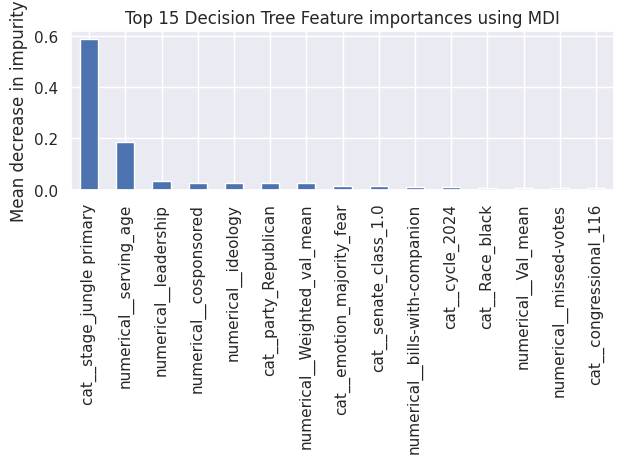

In [ ]:
feature_names = dtr_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(dtr.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[0:15].plot.bar(ax=ax)
ax.set_title("Top 15 Decision Tree Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
! pip install shap
import shap
shap.initjs()

In [ ]:
X_test_t = ctprocessor.fit_transform(X_test)

In [ ]:
dtr_explainer = shap.TreeExplainer(dtr)
dtr_shap_values = dtr_explainer(X_test_t)

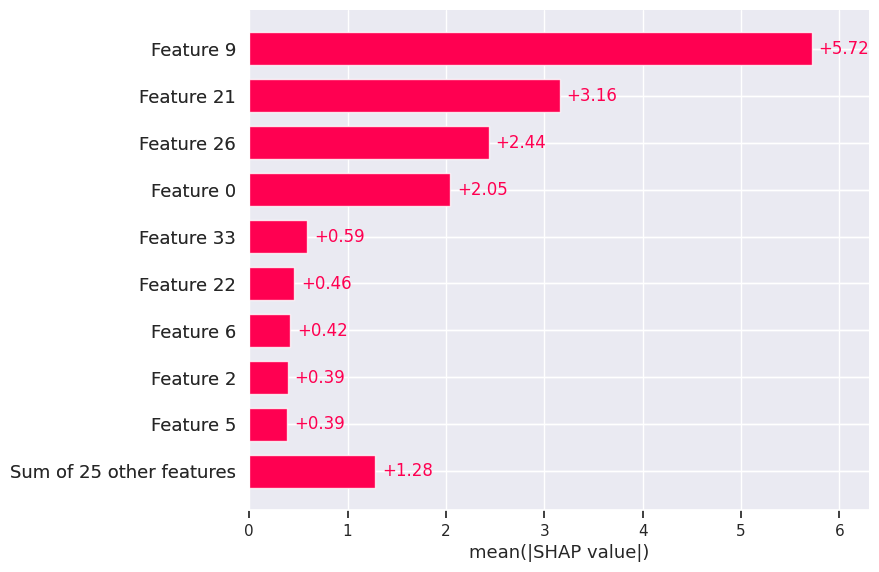

In [ ]:
'''Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

Summary plot: beeswarm
'''
shap.plots.bar(dtr_shap_values)

#### Other Methods
K Nearest Neighbors Regressor

Requires Encoding

In [ ]:
# https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7
knr_parameters = parameter={'n_neighbors': np.arange(2, 30, 1)}

In [ ]:
knr = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knr_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(knr, knr_parameters, n_jobs=2))])
knr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['serving_age', 'Val_mean',
                                                   'Weighted_val_mean',
                                                   'bills-with-companion',
                                                   'cosponsored', 'ideology',
                                                   'leadership',
                                                   'missed-votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['emotion_majority', 'Race',
                                                   'gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle',
                                                   'congressional'])])),
                ('model',
                 GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                              n_jobs=2,
                              param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}))])

In [ ]:
knr_pipeline[1].best_params_

{'n_neighbors': 5}

In [ ]:
knr = knr_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
knr_train_scores = evaluate_model(knr,X_train,y_train)
knr_train_scores

{'mse': 23.743715747238156,
 'mae': 3.4817093664680376,
 'r2': 0.5209577629249731}

##### Testing Scores

In [ ]:
knr_scores = evaluate_model(knr,X_test,y_test)
knr_scores

{'mse': 30.430334289326183,
 'mae': 3.9433813953488377,
 'r2': 0.5068440911210699}

### Supervised Methods - Ensemble Learning

#### Random Forest

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
rf_parameters = {
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 10, 15],
    'n_estimators': [100, 250, 500]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
rf_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(rf, rf_parameters, n_jobs=2))])
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['serving_age', 'Val_mean',
                                                   'Weighted_val_mean',
                                                   'bills-with-companion',
                                                   'cosponsored', 'ideology',
                                                   'leadership',
                                                   'missed-votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['emotion_majority', 'Race',
                                                   'gender', 'party',
                                                   'senate_class', 'stage',
                                                   'cycle',
                                                   'congressional'])])),
                ('model',
                 GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              n_jobs=2,
                              param_grid={'min_samples_leaf': [1, 3, 5],
                                          'min_samples_split': [2, 10, 15],
                                          'n_estimators': [100, 250, 500]}))])

In [ ]:
rf_pipeline[1].best_params_

{'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 500}

In [ ]:
rf = rf_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
rf_train_scores = evaluate_model(rf,X_train,y_train)
rf_train_scores

{'mse': 19.16154489356276, 'mae': 3.118815966380757, 'r2': 0.6127401939229902}

##### Testing Scores

In [ ]:
rf_scores = evaluate_model(rf,X_test,y_test)
rf_scores

{'mse': 21.670455350762445,
 'mae': 3.3578317820329464,
 'r2': 0.6383116697539395}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

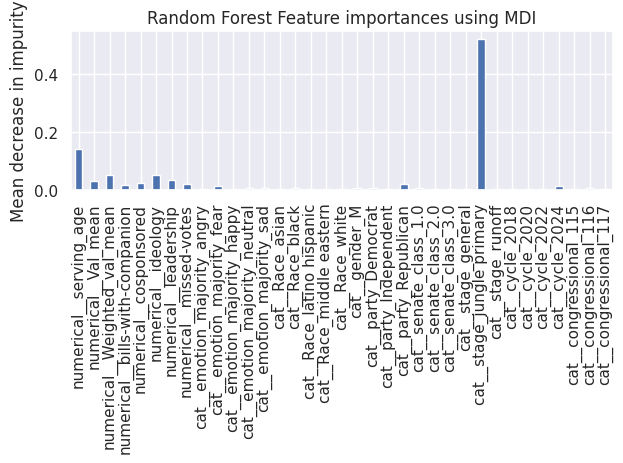

In [ ]:
feature_names = rf_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(rf.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Random Forest Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### XGBoost

In [ ]:
X_train_xgb = X_train.copy()
X_train_xgb[categorical_features] = X_train[categorical_features].astype("category")
X_test_xgb = X_test.copy()
X_test_xgb[categorical_features] = X_test[categorical_features].astype("category")

In [ ]:
# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
xgbr_parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.6],
    'subsample': [0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [ ]:
xgbr = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)

In [ ]:
xgbr_pipeline = GridSearchCV(xgbr, xgbr_parameters, n_jobs=2)
xgbr_pipeline.fit(X_train_xgb,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.3, 0.6],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 1]})

In [ ]:
xgbr_pipeline.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [ ]:
xgbr = xgbr_pipeline.best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
xgbr_train_scores = evaluate_model(xgbr,X_train_xgb,y_train)
xgbr_train_scores

{'mse': 19.307939029424276, 'mae': 3.15372336451866, 'r2': 0.6112185552306638}

##### Testing Scores

In [ ]:
xgbr_scores = evaluate_model(xgbr,X_test_xgb,y_test)
xgbr_scores

{'mse': 22.61483396468522, 'mae': 3.423005784767187, 'r2': 0.6165088196365225}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

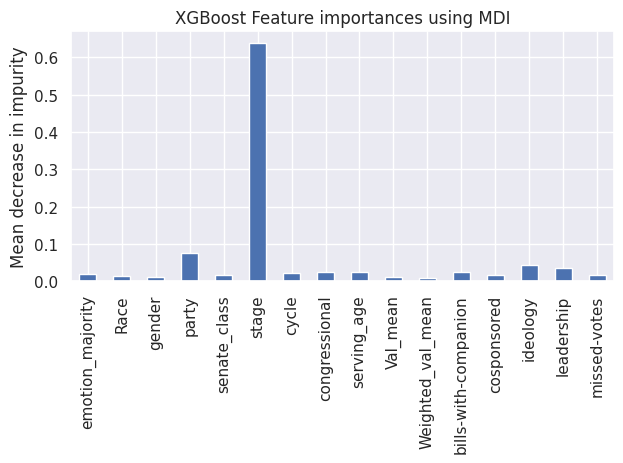

In [ ]:
forest_importances = pd.Series(xgbr.feature_importances_, index=xgbr.feature_names_in_)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("XGBoost Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### XGBoost WITH OHE and Scaling

In [ ]:
# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
xgbr_preproc_parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.6],
    'subsample': [0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [ ]:
xgbr_preproc = xgb.XGBRegressor(tree_method="hist")

In [ ]:
xgbr_preproc_pipeline = Pipeline(steps=[('preprocessor', ctprocessor), ('model',GridSearchCV(xgbr_preproc, xgbr_preproc_parameters, n_jobs=2))])
xgbr_preproc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['serving_age', 'Val_mean',
                                                   'Weighted_val_mean',
                                                   'bills-with-companion',
                                                   'cosponsored', 'ideology',
                                                   'leadership',
                                                   'missed-votes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['emotion_majority', 'Race',
                                                   'gender', 'party',
                                                   '...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=2,
                              param_grid={'learning_rate': [0.1, 0.3, 0.6],
                                          'max_depth': [3, 6, 9],
                                          'n_estimators': [50, 100, 200],
                                          'subsample': [0.5, 1]}))])

In [ ]:
xgbr_preproc_pipeline[1].best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [ ]:
xgbr_preproc = xgbr_preproc_pipeline[1].best_estimator_

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
xgbr_preproc_train_scores = evaluate_model(xgbr_preproc,X_train,y_train)
xgbr_preproc_train_scores

{'mse': 19.307939029424276, 'mae': 3.15372336451866, 'r2': 0.6112185552306638}

##### Testing Scores

In [ ]:
xgbr_preproc_scores = evaluate_model(xgbr_preproc,X_test,y_test)
xgbr_preproc_scores

{'mse': 22.61483396468522, 'mae': 3.423005784767187, 'r2': 0.6165088196365225}

Feature importance based on mean decrease in impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

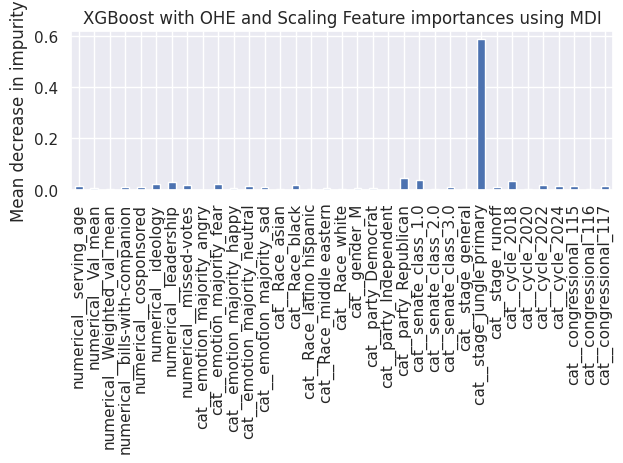

In [ ]:
feature_names = xgbr_preproc_pipeline[:-1].get_feature_names_out()
forest_importances = pd.Series(xgbr_preproc.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("XGBoost with OHE and Scaling Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### CatBoost
No Feature Processing Needed

https://catboost.ai/en/docs/features/categorical-features

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
# https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-regression
cbr_parameters = {
    'iterations': [100, 250, 500],
    'learning_rate': [0.1, 0.4, 0.6],
    'depth':[1, 3, 6],
}

In [ ]:
pool_train = Pool(X_train, y_train, cat_features = categorical_features)
pool_test = Pool(X_test, cat_features = categorical_features)

In [ ]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr = CatBoostRegressor(loss_function='RMSE', task_type='CPU',random_state=1,verbose=False)
grid_search_result = cbr.grid_search(cbr_parameters, pool_train,verbose=False)


bestTest = 5.369892334
bestIteration = 97


bestTest = 5.098645986
bestIteration = 97


bestTest = 5.058580679
bestIteration = 99


bestTest = 5.180122655
bestIteration = 249


bestTest = 4.969488554
bestIteration = 245


bestTest = 4.88130338
bestIteration = 219


bestTest = 5.134893176
bestIteration = 499


bestTest = 4.836436845
bestIteration = 482


bestTest = 4.78166182
bestIteration = 478


bestTest = 4.940364877
bestIteration = 98


bestTest = 4.542137143
bestIteration = 99


bestTest = 4.519210757
bestIteration = 84


bestTest = 4.695320138
bestIteration = 248


bestTest = 4.429731467
bestIteration = 244


bestTest = 4.458636659
bestIteration = 229


bestTest = 4.538114505
bestIteration = 497


bestTest = 4.429731467
bestIteration = 244


bestTest = 4.458636659
bestIteration = 229


bestTest = 4.752579184
bestIteration = 99


bestTest = 4.272059917
bestIteration = 79


bestTest = 4.389494592
bestIteration = 77


bestTest = 4.418042406
bestIteration = 245


bestTest = 4.4731586

In [ ]:
grid_search_result['params']

{'depth': 6, 'learning_rate': 0.4, 'iterations': 100}

In [ ]:
cbr.get_params()

{'loss_function': 'RMSE',
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 1,
 'depth': 6,
 'learning_rate': 0.4,
 'iterations': 100}

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
train_predictions = cbr.predict(pool_train)

In [ ]:
cbr_train_mse = mean_squared_error(y_train, train_predictions)
cbr_train_mae = mean_absolute_error(y_train, train_predictions)
cbr_train_r2 = r2_score(y_train, train_predictions)

In [ ]:
cbr_train_scores = {'mse':cbr_train_mse,'mae':cbr_train_mae,'r2':cbr_train_r2}
cbr_train_scores

{'mse': 13.495391408590692,
 'mae': 2.6789322902502244,
 'r2': 0.7300556530390632}

##### Testing Scores

In [ ]:
test_predictions = cbr.predict(pool_test)

In [ ]:
cbr_mse = mean_squared_error(y_test, test_predictions)
cbr_mae = mean_absolute_error(y_test, test_predictions)
cbr_r2 = r2_score(y_test, test_predictions)

In [ ]:
cbr_scores = {'mse':cbr_mse,'mae':cbr_mae,'r2':cbr_r2}
cbr_scores

{'mse': 17.707686573822535,
 'mae': 3.1192930943465793,
 'r2': 0.7404931865450537}

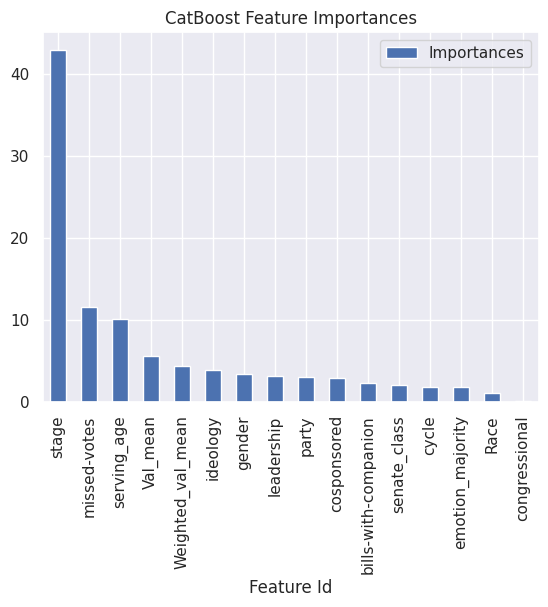

In [ ]:
cbr.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances")
fig.tight_layout()

#### CatBoost WITH OneHotEncoding and StdScaler Transformed Data

https://catboost.ai/en/docs/features/categorical-features

In [ ]:
ctprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['serving_age', 'Val_mean',
                                  'Weighted_val_mean', 'bills-with-companion',
                                  'cosponsored', 'ideology', 'leadership',
                                  'missed-votes']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['emotion_majority', 'Race', 'gender', 'party',
                                  'senate_class', 'stage', 'cycle',
                                  'congressional'])])

In [ ]:
X_train_t = ctprocessor.transform(X_train)
X_test_t = ctprocessor.transform(X_test)

In [ ]:
features = ctprocessor.get_feature_names_out()
X_train_t = pd.DataFrame(X_train_t, columns=features)
X_test_t = pd.DataFrame(X_test_t, columns=features)

In [ ]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr_t = CatBoostRegressor(n_estimators=200,loss_function='RMSE',learning_rate=0.4,depth=3, task_type='CPU',random_state=1,verbose=False)

In [ ]:
pool_train_t = Pool(X_train_t, y_train)
pool_test_t = Pool(X_test_t)

In [ ]:
cbr_t.fit(pool_train_t)

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
train_predictions_t = cbr_t.predict(pool_train_t)

In [ ]:
cbr_train_mse_t = mean_squared_error(y_train, train_predictions_t)
cbr_train_mae_t = mean_absolute_error(y_train, train_predictions_t)
cbr_train_r2_t = r2_score(y_train, train_predictions_t)

In [ ]:
cbr_train_scores_t = {'mse':cbr_train_mse_t,'mae':cbr_train_mae_t,'r2':cbr_train_r2_t}
cbr_train_scores_t

{'mse': 12.607932613391867,
 'mae': 2.5822923096933024,
 'r2': 0.7478072304236352}

##### Testing Scores

In [ ]:
test_predictions_t = cbr_t.predict(pool_test_t)

In [ ]:
cbr_mse_t = mean_squared_error(y_test, test_predictions_t)
cbr_mae_t = mean_absolute_error(y_test, test_predictions_t)
cbr_r2_t = r2_score(y_test, test_predictions_t)

In [ ]:
cbr_scores_t = {'mse':cbr_mse_t,'mae':cbr_mae_t,'r2':cbr_r2_t}
cbr_scores_t

{'mse': 17.71372360704272, 'mae': 3.0829393865176065, 'r2': 0.7404047135959104}

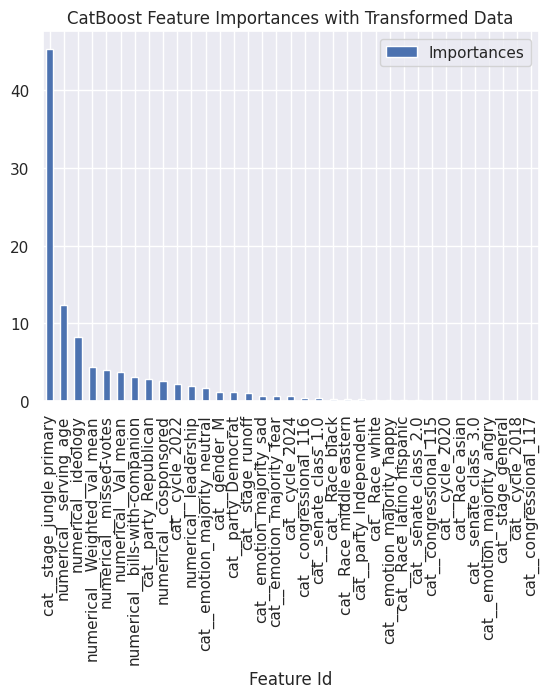

In [ ]:
cbr_t.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances with Transformed Data")
fig.tight_layout()

In [ ]:
# TODO: Properly Extract Feature Names

#### CatBoost Witholding Emotion Features
No Feature Processing Needed

https://catboost.ai/en/docs/features/categorical-features

In [ ]:
# https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923
cbr_ne = CatBoostRegressor(n_estimators=200,loss_function='RMSE',learning_rate=0.4,depth=3, task_type='CPU',random_state=1,verbose=False)

In [ ]:
categorical_features_ne = ['gender', 'party', 'senate_class', 'stage', 'cycle', 'Race']

In [ ]:
pool_train_ne = Pool(X_train.drop(columns=['emotion_majority','Val_mean','Weighted_val_mean']), y_train, cat_features = categorical_features_ne)
pool_test_ne = Pool(X_test.drop(columns=['emotion_majority','Val_mean','Weighted_val_mean']), cat_features = categorical_features_ne)

In [ ]:
cbr_ne.fit(pool_train_ne)

##### Training Scores
Refer to this for evaluation of train/test scores: https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [ ]:
train_predictions_ne = cbr_ne.predict(pool_train_ne)

In [ ]:
cbr_train_mse_ne = mean_squared_error(y_train, train_predictions_ne)
cbr_train_mae_ne = mean_absolute_error(y_train, train_predictions_ne)
cbr_train_r2_ne = r2_score(y_train, train_predictions_ne)

In [ ]:
cbr_train_scores_ne = {'mse':cbr_train_mse_ne,'mae':cbr_train_mae_ne,'r2':cbr_train_r2_ne}
cbr_train_scores_ne

{'mse': 15.711857618982283,
 'mae': 2.8838419969221456,
 'r2': 0.6857203310309685}

##### Testing Scores

In [ ]:
test_predictions_ne = cbr_ne.predict(pool_test_ne)

In [ ]:
cbr_mse_ne = mean_squared_error(y_test, test_predictions_ne)
cbr_mae_ne = mean_absolute_error(y_test, test_predictions_ne)
cbr_r2_ne = r2_score(y_test, test_predictions_ne)

In [ ]:
cbr_scores_ne = {'mse':cbr_mse_ne,'mae':cbr_mae_ne,'r2':cbr_r2_ne}
cbr_scores_ne

{'mse': 17.65740655910457, 'mae': 3.141777407020321, 'r2': 0.7412300420538482}

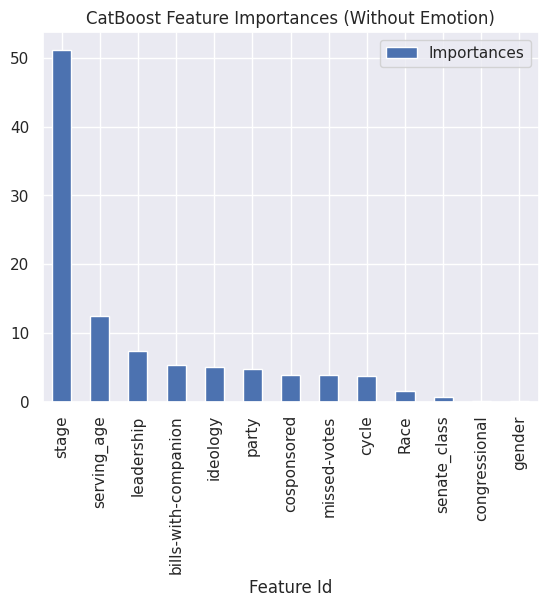

In [ ]:
cbr_ne.get_feature_importance(prettified=True).plot.bar(x='Feature Id', y='Importances')
plt.xticks(rotation=90)
plt.title("CatBoost Feature Importances (Without Emotion)")
fig.tight_layout()

## Modeling Evaulation

In [ ]:
# TODO: Jungle Primary feature importance potentially very interesting - https://politicaldictionary.com/words/jungle-primary/

## Unsupervised Modeling - TODO Week 10!

### KMeans and Hierarchical Clustering

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])